<a href="https://colab.research.google.com/github/Tamilmarai/Portfolio_Projects/blob/main/Project_I__Implementing_linear_regression_4_5_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - I

## Linear Regression 
In this implementation, we will be looking at the following the steps as follows:

1.    Importing Libraries and Dataset
2.    Scaling the dataset
3.    Checking Multicollinearity and removing it
4.    Creating test and training partitions
5.    Implementing the Linear Regression model
6.    Generating predictions over the test set
7.    Evaluating the model
8.    Preparing the Residual plot.
9.    Checking the Assumptions of Linear Regression.
10.   Visualising the Coefficient plot


##Problem Statement

The data (given below) contains the selling prices of different houses based on different characteristics/attributes like area, no. of rooms, no. of bathrooms, etc.

At times, the property dealers appreciate the prices based on the demand and hence there is rise in prices in real estate. So, in order to cope with this problem so that it is beneficial for the customers, we must have a model in place which should tell us the ideal prices of the house based on its characteristics.

The objective of the study is to predict the ideal prices of the houses based on their characteristics using a regression algorithm.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries and dataset

In [ ]:
import pandas as pd                    # For reading files into DataFrame and such.
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1_25_4_2022/Raw_Housing_Prices.csv')
df_data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## Data Exploration : 


 
1.   What info does the target variablel represent?
2.   What is the data type of target variable?
3.   Is there a pattern or anomalies in the target variable?
4.   Use describe(), what do you infer?
5.   Treat outliers.
6.   Treat missing values.
7.   Plot a histogram, values skewed or normally distributed?





###(i) Exploration of target variable :

1.   What info does the target variablel represent?

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

2. What is the data type of target variable?

In [ ]:
df_data['Sale Price'].dtype

dtype('float64')

3. Is there a pattern or anomalies in the target variable?


In [ ]:
df_data['Sale Price'].index

RangeIndex(start=0, stop=21613, step=1)

In [ ]:
df_data['Sale Price'].head(15)

0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
5     1230000.0
6      257500.0
7      291850.0
8      229500.0
9      323000.0
10     662500.0
11     468000.0
12     310000.0
13     400000.0
14     530000.0
Name: Sale Price, dtype: float64

4. Use describe(), what do you infer?

In [ ]:
df_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

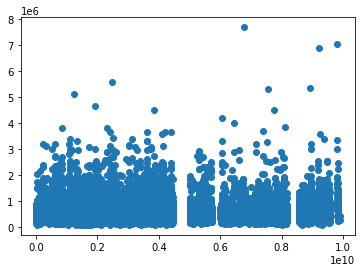

In [ ]:
plt.scatter(x=df_data['ID'],y=df_data['Sale Price'])


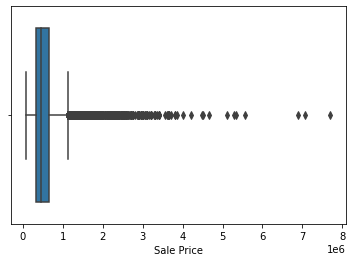

In [ ]:
sns.boxplot(x=df_data['Sale Price'])

*  There seems to be few missing values as the count of Sale Price here gives 21609 values but the overall count is 21613.
* There are many outliers present as per the box-plot.

5. Treat outliers.

In [ ]:
q1= df_data['Sale Price'].quantile(0.25)
q3= df_data['Sale Price'].quantile(0.75)
iqr = q3-q1
upper_limit =q3+1.5*iqr
lower_limit =q1-1.5*iqr 

In [ ]:
def limit_imputer(value) :
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value
  


In [ ]:
df_data['Sale Price'] = df_data['Sale Price'].apply(limit_imputer)

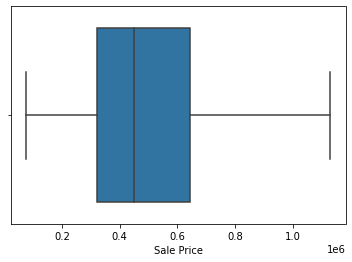

In [ ]:
sns.boxplot(x=df_data['Sale Price'])

6. Treat missing values.

* Since imputing is not recommended for treating missing values in target variable.
* The entire row containing missing values wil be deleted from the datatset.

In [ ]:
df_data.dropna(inplace = True, axis = 0 , subset=['Sale Price'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
df_data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

7. Plot a histogram, values skewed or normally distributed?


(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <a list of 10 Patch objects>)

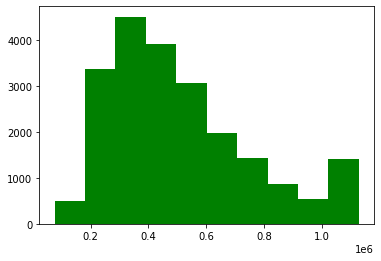

In [ ]:
plt.hist(df_data['Sale Price'], bins = 10, color = 'green')

* The histogram is right skewed.





In [ ]:
data=df_data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


### (ii)  Exploration of independent Numerical variable


1.   What info does the target variablel represent?
2.   What is the data type of target variable?
3.   Is there a pattern or anomalies in the target variable?
4.   Use describe(), what do you infer?
5.   Treat outliers.
6.   Treat missing values.
7.   Plot a histogram, values skewed or normally distributed?
8.   How is the independent variable correlated with the target variable?
9.   How is this independent variable correlated with the other independent variable?   

In [ ]:
# Selecting all features without object data type
data_1=data.select_dtypes(exclude = ['object'])
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21605 non-null  float64
 4   Flat Area (in Sqft)                        21600 non-null  float64
 5   Lot Area (in Sqft)                         21600 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21606 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

In [ ]:
data_1


,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
#Selecting features with missing values
numerical_columns=data[['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']]
numerical_columns.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bathrooms                            21605 non-null  float64
 1   Flat Area (in Sqft)                        21600 non-null  float64
 2   Lot Area (in Sqft)                         21600 non-null  float64
 3   Area of the House from Basement (in Sqft)  21606 non-null  float64
 4   Latitude                                   21608 non-null  float64
 5   Longitude                                  21608 non-null  float64
 6   Living Area after Renovation (in Sqft)     21608 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data[['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']]=imputer.fit_transform(numerical_columns)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
column=data['Zipcode'].values.reshape(-1,1)

imputer =SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(column)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
# Converting Zipcode into object datatype
data['Zipcode']=data['Zipcode'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

### i ) Transforming 'number of times visited' object to numeric :

In [ ]:
# Finding unique values of the 'No of Times Visited' feature
data['No of Times Visited'].unique()


array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [ ]:
mapping = {
   'None' : '0',
   'Once':'1',
   'Twice':'2',
   'Thrice':'3',
   'Four':'4'
}

In [ ]:
data['No of Times Visited']=data['No of Times Visited'].map(mapping)
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

###ii) Creating a fearture called Ever Renovated :

In [ ]:
data['Ever Renovated']= np.where(data['Renovated Year']==0,'No','Yes')
data['Ever Renovated']

0         No
1        Yes
2         No
3         No
4         No
        ... 
21608     No
21609     No
21610     No
21611     No
21612     No
Name: Ever Renovated, Length: 21609, dtype: object

### iii) Creating a new freature named Purchase year:

In [ ]:
data['Purchase Year']= pd.DatetimeIndex(data['Date House was Sold']).year
data['Purchase Year']

0        2017
1        2017
2        2016
3        2017
4        2016
         ... 
21608    2017
21609    2016
21610    2017
21611    2016
21612    2017
Name: Purchase Year, Length: 21609, dtype: int64

### iv) Creating a new feature Yr Since Renovation :

In [ ]:
data['Yr Since Renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']-data['Renovated Year']),0)
data['Yr Since Renovation']

0         0
1        26
2         0
3         0
4         0
         ..
21608     0
21609     0
21610     0
21611     0
21612     0
Name: Yr Since Renovation, Length: 21609, dtype: int64

In [ ]:
data_i_num=data.select_dtypes(include = ['int64'])
data_i_num.describe()

,ID,No of Bedrooms,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Lot Area after Renovation (in Sqft),Purchase Year,Yr Since Renovation
count,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,4.580686e+09,3.370771,7.623490,291.513490,46.999722,84.417881,12769.770790,2016.677079,0.884122
std,2.876653e+09,0.929916,1.105519,442.570991,29.373317,401.714775,27306.508841,0.467604,5.279629
min,1.000102e+06,0.000000,1.000000,0.000000,3.000000,0.000000,651.000000,2016.000000,0.000000
25%,2.123049e+09,3.000000,7.000000,0.000000,21.000000,0.000000,5100.000000,2016.000000,0.000000
50%,3.904931e+09,3.000000,7.000000,0.000000,43.000000,0.000000,7620.000000,2017.000000,0.000000
75%,7.308900e+09,4.000000,8.000000,560.000000,67.000000,0.000000,10084.000000,2017.000000,0.000000
max,9.900000e+09,33.000000,10.000000,4820.000000,118.000000,2015.000000,871200.000000,2017.000000,83.000000


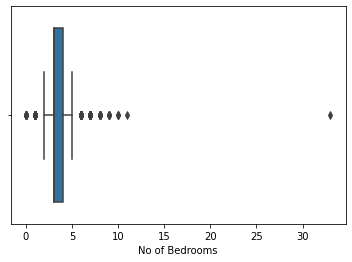

In [ ]:
sns.boxplot(x=data['No of Bedrooms'])

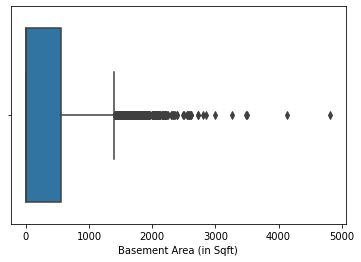

In [ ]:
sns.boxplot(x=data['Basement Area (in Sqft)'])

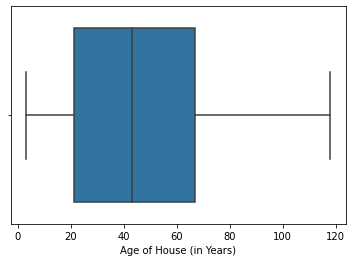

In [ ]:
sns.boxplot(x=data['Age of House (in Years)'])

In [ ]:
data_f_num=data.select_dtypes(include = ['float64'])
data_f_num.describe()

,Sale Price,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Area of the House from Basement (in Sqft),Latitude,Longitude,Living Area after Renovation (in Sqft)
count,2.160900e+04,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,2.114709,2079.872553,1.510641e+04,1.494215,1788.319589,47.560050,-122.213875,1986.553242
std,2.500620e+05,0.770097,918.347816,4.142353e+04,0.539909,827.977604,0.138556,0.140832,685.427485
min,7.500000e+04,0.000000,290.000000,5.200000e+02,1.000000,290.000000,47.155900,-122.519000,399.000000
25%,3.219500e+05,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,47.471000,-122.328000,1490.000000
50%,4.500000e+05,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,47.571800,-122.230000,1840.000000
75%,6.450000e+05,2.500000,2550.000000,1.068700e+04,2.000000,2210.000000,47.678000,-122.125000,2360.000000
max,1.129575e+06,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,47.777600,-121.315000,6210.000000


### Correlation :

In [ ]:
corr=data_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.011529,0.001450,0.005269,-0.012376,-0.132151,0.018653,0.013762,-0.010709,-0.005189,-0.021524,-0.016936,-0.008260,-0.001990,0.020721,-0.002920,-0.138843
Sale Price,-0.011529,1.000000,0.339407,0.535200,0.695231,0.101398,0.298913,0.680914,0.606649,0.307513,-0.064306,0.122021,-0.043058,0.402430,0.045400,0.629943,0.092325
No of Bedrooms,0.001450,0.339407,1.000000,0.515829,0.576678,0.031644,0.175536,0.349223,0.477558,0.303294,-0.154113,0.018861,-0.152752,-0.008703,0.129574,0.391769,0.029264
No of Bathrooms,0.005269,0.535200,0.515829,1.000000,0.754694,0.087772,0.500803,0.635670,0.685239,0.283805,-0.505983,0.050769,-0.204047,0.024583,0.223212,0.568632,0.087231
Flat Area (in Sqft),-0.012376,0.695231,0.576678,0.754694,1.000000,0.172807,0.354217,0.705894,0.876603,0.435211,-0.318291,0.055365,-0.199403,0.052563,0.240131,0.756353,0.183218
Lot Area (in Sqft),-0.132151,0.101398,0.031644,0.087772,0.172807,1.000000,-0.005178,0.102344,0.183514,0.015275,-0.053112,0.007709,-0.129541,-0.085684,0.229477,0.144539,0.718544
No of Floors,0.018653,0.298913,0.175536,0.500803,0.354217,-0.005178,1.000000,0.461368,0.524053,-0.245572,-0.489244,0.006376,-0.059223,0.049697,0.125617,0.280121,-0.011204
Overall Grade,0.013762,0.680914,0.349223,0.635670,0.705894,0.102344,0.461368,1.000000,0.705264,0.145232,-0.456711,0.010436,-0.185852,0.111229,0.201734,0.681368,0.107581
Area of the House from Basement (in Sqft),-0.010709,0.606649,0.477558,0.685239,0.876603,0.183514,0.524053,0.705264,1.000000,-0.051809,-0.423878,0.023300,-0.261157,-0.000787,0.343794,0.732032,0.194101
Basement Area (in Sqft),-0.005189,0.307513,0.303294,0.283805,0.435211,0.015275,-0.245572,0.145232,-0.051809,1.000000,0.133072,0.071328,0.074938,0.110453,-0.144820,0.200298,0.017263


### (iii)  Exploration of Independent Categorical variable


1. What info does the Categorical variablel represent?
2. What is the data type of Categorical variable?
3. Is there a pattern or anomalies in the Categorical variable?
4. How many and what unique values/levels does the categorical variable have & what is the frequency distribution of those unique values?
5. How is the Target variable correlated with these categorical values?




In [ ]:
data_obj=data.select_dtypes(include = ['object'])
data_obj.describe()

,Date House was Sold,Waterfront View,No of Times Visited,Condition of the House,Zipcode,Ever Renovated
count,21609,21609,21609,21609,21609.0,21609
unique,13,2,5,5,70.0,2
top,15 April 2016,No,0,Fair,98103.0,No
freq,2231,21446,19485,14028,602.0,20695


### i)    Waterfront View: 

In [ ]:
data_obj['Waterfront View'].head()

0    No
1    No
2    No
3    No
4    No
Name: Waterfront View, dtype: object

In [ ]:
data_obj['Waterfront View'].value_counts()

No     21446
Yes      163
Name: Waterfront View, dtype: int64

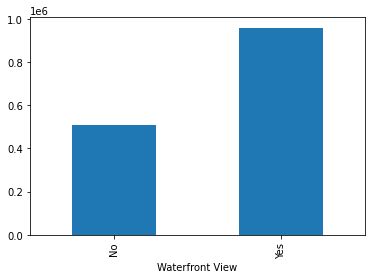

In [ ]:
data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

### ii) No of Times Visited :

In [ ]:
data_obj['No of Times Visited'].head()

0    0
1    0
2    0
3    0
4    0
Name: No of Times Visited, dtype: object

In [ ]:
data_obj['No of Times Visited'].value_counts()

0    19485
2      963
3      510
1      332
4      319
Name: No of Times Visited, dtype: int64

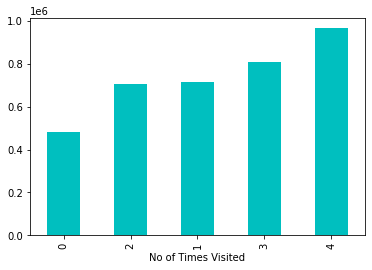

In [ ]:
data.groupby('No of Times Visited',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color='c')

### iii) Condition of the house :

In [ ]:
data_obj['Condition of the House'].head()

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
Name: Condition of the House, dtype: object

In [ ]:
data_obj['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

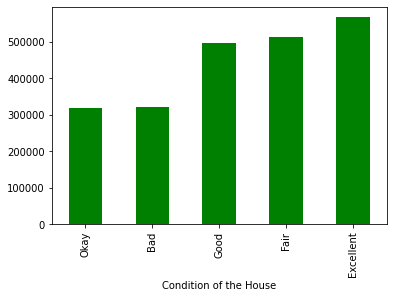

In [ ]:
data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color='g')

### iv) Zipcode :

In [ ]:
data_obj['Zipcode'].head()

0    98178.0
1    98125.0
2    98028.0
3    98136.0
4    98074.0
Name: Zipcode, dtype: object

In [ ]:
data_obj['Zipcode'].value_counts()

98103.0    602
98038.0    590
98115.0    583
98052.0    574
98117.0    553
          ... 
98102.0    105
98010.0    100
98024.0     81
98148.0     57
98039.0     50
Name: Zipcode, Length: 70, dtype: int64

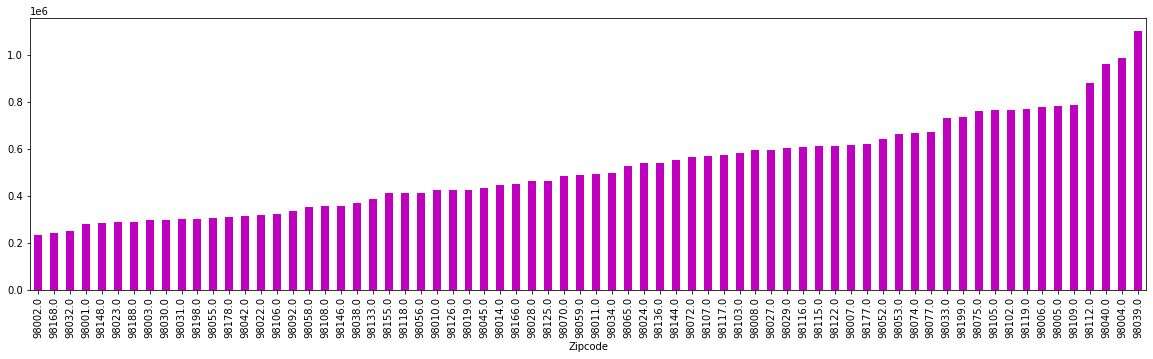

In [ ]:
plt.figure(figsize=(20,5))
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar',color='m')

### Relationship between Categorical value and Numeric Target Value :

*    Does the categorical varaible have any impact on the target variable?



In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [ ]:
data=data.rename(columns={'Sale Price': 'Sale_Price',
                                 'Condition of the House':'Condition_of_the_House',
                                 'Ever Renovated':'Ever_Renovated',
                                 'Waterfront View':'Waterfront_View',
                          'No of Times Visited':'No_of_Times_Visited'})
data.head()


,ID,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No_of_Times_Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Purchase Year,Yr Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [ ]:
mod = ols('Sale_Price ~ Condition_of_the_House',data=data).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [ ]:
mod = ols('Sale_Price ~ Ever_Renovated',data=data).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                      sum_sq       df           F        PR(>F)
Ever_Renovated  1.998463e+13      1.0  324.378469  5.419055e-72
Residual        1.331185e+15  21607.0         NaN           NaN


In [ ]:
mod = ols('Sale_Price ~ Waterfront_View',data=data).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                       sum_sq       df           F         PR(>F)
Waterfront_View  3.283737e+13      1.0  538.192683  1.275558e-117
Residual         1.318333e+15  21607.0         NaN            NaN


In [ ]:
mod = ols('Sale_Price ~ Zipcode',data=data).fit()
Anova_Table = sm.stats.anova_lm(mod,typ=2)
print(Anova_Table)

                sum_sq       df           F  PR(>F)
Zipcode   6.859657e+14     69.0  321.902033     0.0
Residual  6.652044e+14  21539.0         NaN     NaN


## Binning and Creation of Dummy Variables : 

In [ ]:
#Creating Dummy variables
data=pd.get_dummies(data,columns=['Condition_of_the_House','Waterfront_View','Ever_Renovated'],drop_first=True)
data.head()

,ID,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Overall Grade,...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Yr Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,...,1340.0,5650,2017,0,0,1,0,0,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,...,1690.0,7639,2017,26,0,1,0,0,0,1
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,6,...,2720.0,8062,2016,0,0,1,0,0,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,...,1360.0,5000,2017,0,1,0,0,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,...,1800.0,7503,2016,0,0,1,0,0,0,0


In [ ]:
Zip_Table =data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=7)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [ ]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'],bins=10,labels=['Zipcode_Group_0','Zipcode_Group_1','Zipcode_Group_2','Zipcode_Group_3','Zipcode_Group_4','Zipcode_Group_5',
                                                                             'Zipcode_Group_6','Zipcode_Group_7','Zipcode_Group_8','Zipcode_Group_9'],include_lowest = True)
Zip_Table.head()


,Sale_Price,Zipcode_Group
Zipcode,,
98002.0,234284.035176,Zipcode_Group_0
98168.0,240328.371747,Zipcode_Group_0
98032.0,251296.240000,Zipcode_Group_0
98001.0,280804.690608,Zipcode_Group_0
98148.0,284908.596491,Zipcode_Group_0


In [ ]:
Zip_Table = Zip_Table.drop(columns='Sale_Price') 

In [ ]:
data = pd.merge(data,Zip_Table,left_on='Zipcode',how='left',right_index=True)
data=data.drop(columns='Zipcode')
data.head()

,ID,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Overall Grade,...,Lot Area after Renovation (in Sqft),Purchase Year,Yr Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,...,5650,2017,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,...,7639,2017,26,0,1,0,0,0,1,Zipcode_Group_2
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,6,...,8062,2016,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,...,5000,2017,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,...,7503,2016,0,0,1,0,0,0,0,Zipcode_Group_4


In [ ]:
data = pd.get_dummies(data,columns=['Zipcode_Group'],drop_first=True)
data.head()

,ID,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Overall Grade,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,...,1,0,1,0,0,0,0,0,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,6,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,...,0,0,0,0,1,0,0,0,0,0


## Splitting Data into Test and Train

In [ ]:
Y = data.iloc[:,0]
Y

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21608     263000018
21609    6600060120
21610    1523300141
21611     291310100
21612    1523300157
Name: ID, Length: 21609, dtype: int64

In [ ]:
X=data.iloc[:,1:]
X

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,...,0,0,0,1,0,0,0,0,0,0
21609,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,...,0,1,0,0,0,0,0,0,0,0
21610,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,...,0,0,0,1,0,0,0,0,0,0
21611,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,...,0,0,0,0,1,0,0,0,0,0


# Implementing Linear Regression Model 

1.  Import the libraries in the dataset.
2.  Scaling the dataset.
3.  Treating Multicollinearity.
4.  Creating test and train partitions
5.  Implementing the linear regression model using Scikit - learn.
6.  Generating predictions over the test set.
7.  Evaluating the models.
8.  Plotting the residuals.
9.  Verifying the Linear Regression Assumptions.
10. Vizualise the coefficients to interpret the model results.





In [ ]:
#Scaling the data set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y=data['Sale_Price']
X=scaler.fit_transform(data.drop(columns=['Sale_Price','Date House was Sold']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price','Date House was Sold']).columns)
X.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,0.885986,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,0.637358,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,0.365299,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,-0.727767,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.912987,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Selecting pair of independent variable with correlation > 0.5

In [ ]:
#Pair of ideendent variable with correlation > 0.5

k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]> abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

### Treating Multicollinearity Using VIF :


In [ ]:
# importing variance_inflation_factor function from the statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X
# Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1]) ],index = vif_data.columns)


In [ ]:
VIF,len(vif_data.columns)

(ID                                           1.041993e+00
 No of Bedrooms                               1.639764e+00
 No of Bathrooms                              3.375201e+00
 Flat Area (in Sqft)                          1.481844e+03
 Lot Area (in Sqft)                           2.113837e+00
 No of Floors                                 2.128203e+00
 No_of_Times_Visited                          1.433893e+00
 Overall Grade                                2.969408e+00
 Area of the House from Basement (in Sqft)    1.205669e+03
 Basement Area (in Sqft)                      3.455011e+02
 Age of House (in Years)                      2.629869e+00
 Renovated Year                               2.015964e+07
 Latitude                                     2.472175e+00
 Longitude                                    1.676337e+00
 Living Area after Renovation (in Sqft)       3.068190e+00
 Lot Area after Renovation (in Sqft)          2.154210e+00
 Purchase Year                                1.046611e+

In [ ]:
VIF[VIF==VIF.max()].index[0]

'Ever_Renovated_Yes'

### Removing variable with high VIF :

In [ ]:
##  remove vif
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1]) ],index = data.columns)
  if vif.max() > 5 :
    print(vif[vif==vif.max()].index[0],'has been removed')
    data = data.drop(columns=[vif[vif==vif.max()].index[0]])
    return data
  else: 
    print('No Multicollinearity present anymore')
    return data 



In [ ]:
for i in range(7) :
  vif_data = MC_remover(vif_data)


Ever_Renovated_Yes has been removed
Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


In [ ]:
vif_data.head()

,ID,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,0.885986,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,0.637358,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,0.365299,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,-0.727767,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.912987,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Remaining columns:

In [ ]:
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1]) ],index = vif_data.columns)
VIF,len(vif_data.columns)

(ID                                           1.041871
 No of Bedrooms                               1.639157
 No of Bathrooms                              3.373813
 Lot Area (in Sqft)                           2.113231
 No of Floors                                 2.128119
 No_of_Times_Visited                          1.433836
 Overall Grade                                2.958225
 Area of the House from Basement (in Sqft)    4.580514
 Basement Area (in Sqft)                      1.975112
 Age of House (in Years)                      2.626592
 Renovated Year                               2.895674
 Latitude                                     2.471956
 Longitude                                    1.675633
 Living Area after Renovation (in Sqft)       3.063931
 Lot Area after Renovation (in Sqft)          2.153927
 Purchase Year                                1.006713
 Yr Since Renovation                          2.730472
 Condition_of_the_House_Excellent             1.209979
 Condition

## Train - Test Split :

In [ ]:
# Train Test split : 
X = vif_data
y=data['Sale_Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=101)

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((15126, 30), (6483, 30), (15126,), (6483,))

## Implementing Linear Regression : 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)



LinearRegression(normalize=True)

In [ ]:
lr.coef_

array([  -852.87585562,  -4006.53704033,  11945.92603668,  14759.5977738 ,
         2890.67330217,  27062.1286431 ,  60326.64649425,  80743.25156997,
        27762.34536492,  27813.3015249 ,  14830.38566289,  21724.5075828 ,
       -23825.16397442,  18049.50637368,  -2828.0191691 , -11196.32814092,
       -10017.19573202,  14858.66925994,   5341.22835771,  -2340.45335149,
        10784.96813492,  11864.80713017,  33704.44311359,  63064.36972192,
        81100.70394968,  50467.85863018,  73252.33005834,  40107.91402302,
        67307.19676977,  22104.39838879])

In [ ]:
predictions = lr.predict(x_test)

# Calculating R square value : 
lr.score(x_test,y_test)


0.8479194871017108

## 1. Residuals :

In [ ]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [ ]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

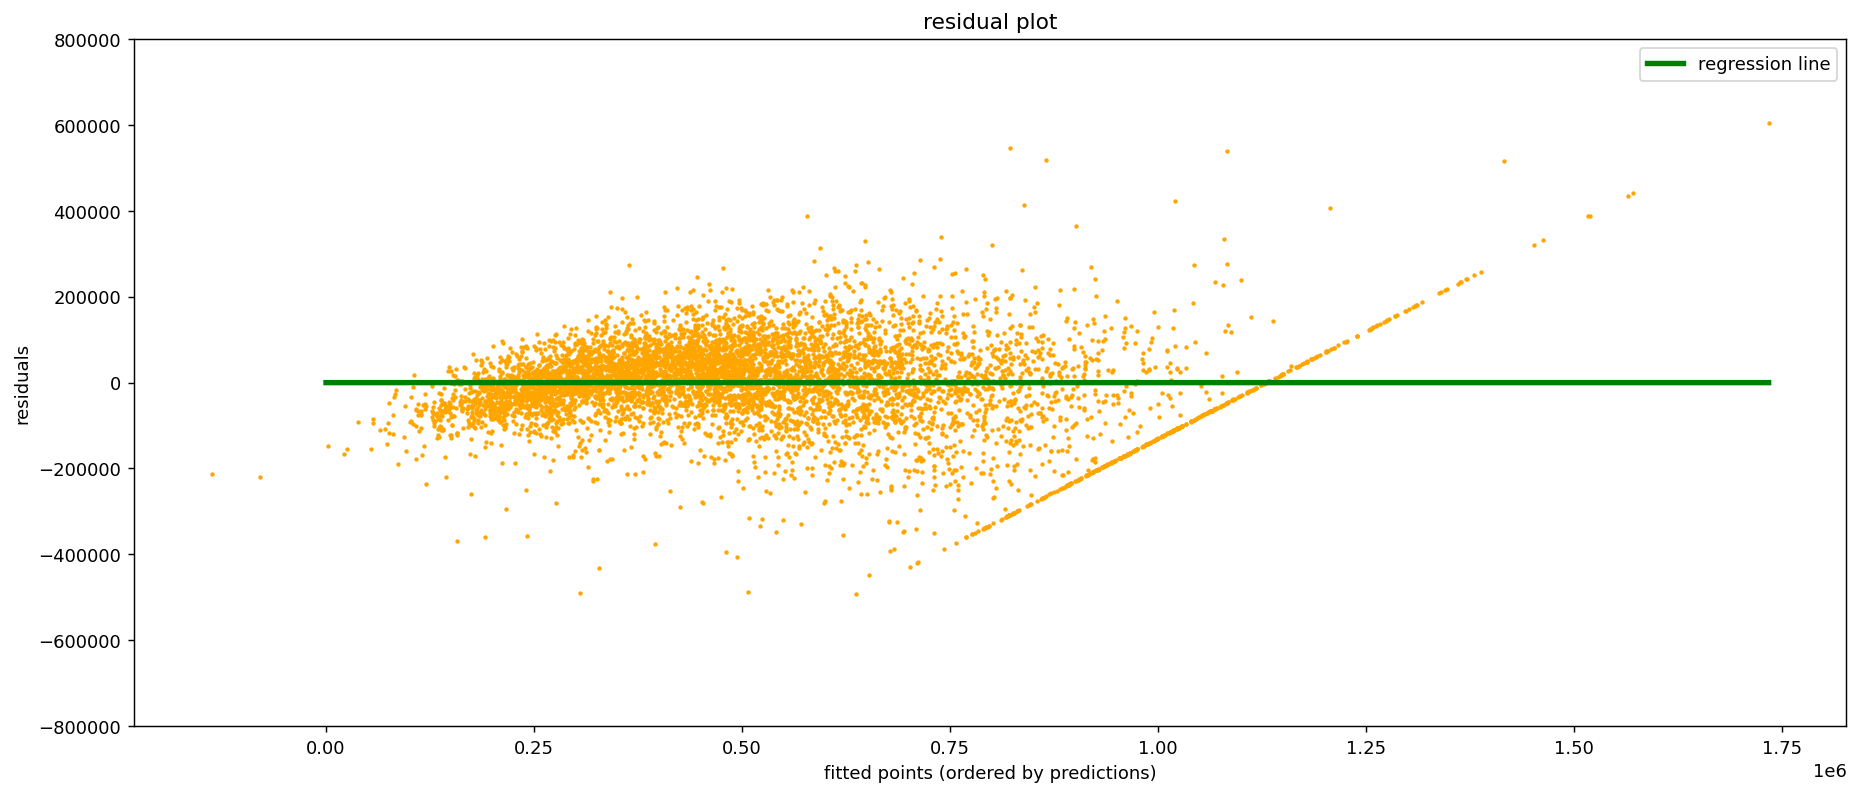

In [ ]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'orange', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distributon of Errors

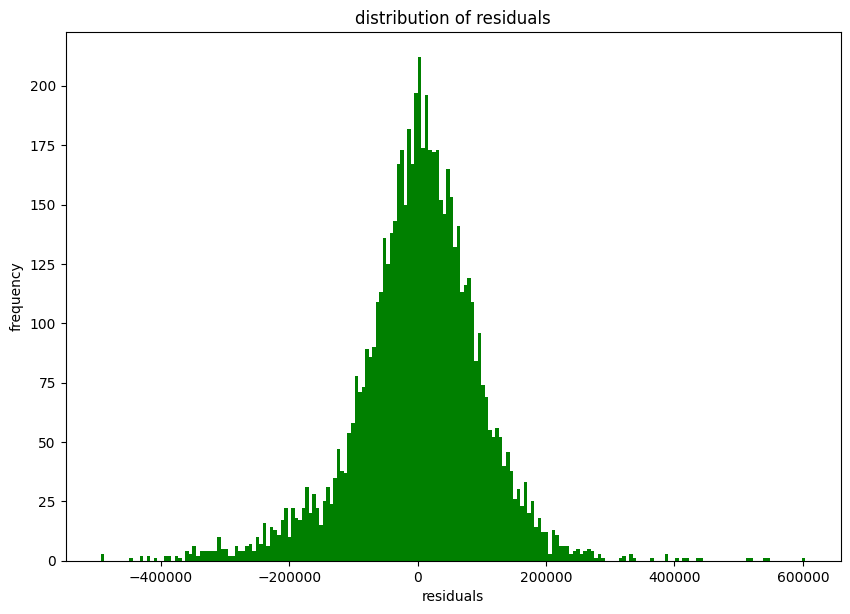

In [ ]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'green', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## 3. Model Coefficients

In [ ]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


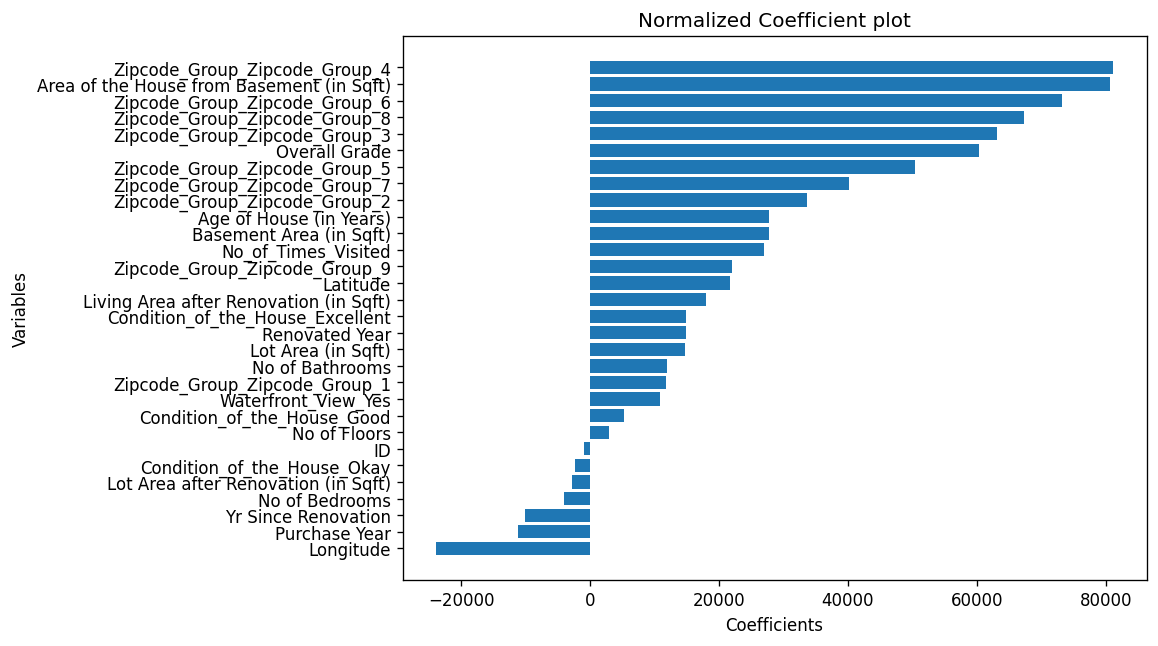

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()